In [7]:
%config Completer.use_jedi = False

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

/Users/sanghyub/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
predictions = [0.9,0.3,0.8,0.75,0.65,0.6,0.78,0.7,0.05,0.4,0.4,0.05,0.5,0.1,0.1]
actual = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]

In [10]:
# gini coefficient
def gini(actual, pred):
    assert(len(actual) ==len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))],
                    dtype = np.float)
    all = all[np.lexsort((all[:,2], -1*all[:,1]))]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2
    return giniSum / len(actual)

def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [11]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_normalized(actual, predictions)

print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini : %.3f'%(gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini : 0.630


In [12]:
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d : d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [14]:
trn = pd.read_csv('data/train.csv', na_values=['-1','-1.0'])
tst = pd.read_csv('data/test.csv', na_values=['-1','-1.0'])

In [15]:
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [16]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [17]:
pd.options.display.max_columns = 100

In [18]:
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000,595105.000000,595207.000000,183981.000000,595212.000000,328661.000000,595212.000000,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000,595207.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.894047,8.297605,0.829947,0.601741,0.725192,0.525365,6.555340,0.947621,0.832080,1.331118,0.992136,62.215674,2.346100,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.345413,2.505396,0.375680,0.489541,2.153463,0.499357,5.501445,0.222791,0.373796,0.976559,0.091619,33.012455,0.832495,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.633443,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.801561,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.0000

In [19]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [20]:
trn.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [21]:
# 타겟 변수의 고유값과 타겟==1의 비율을 계산한다
print(np.unique(trn['target']))
print(1.0 * sum(trn['target'])/trn.shape[0])

[0 1]
0.036447517859182946


In [22]:
tst['target'] = np.nan

In [23]:
df = pd.concat([trn,tst],axis=0)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

In [25]:
def bar_plot(col, data, hue = None):
    f, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()

def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins = 10)
    plt.show()
    
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x = col, y = 'target', data=data)
    plt.show()

### 단일 변수 히스토그램

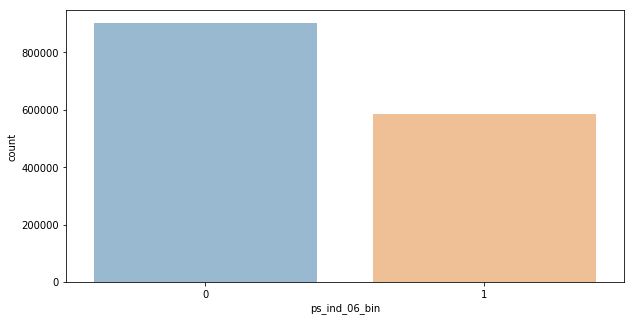

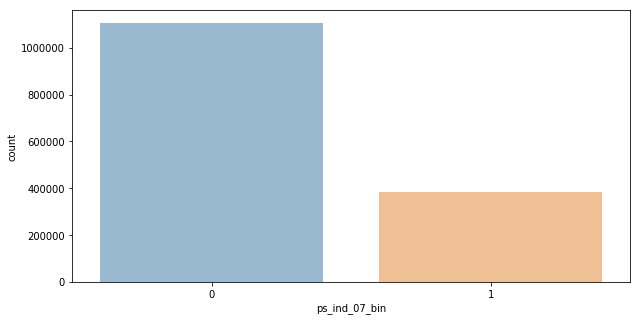

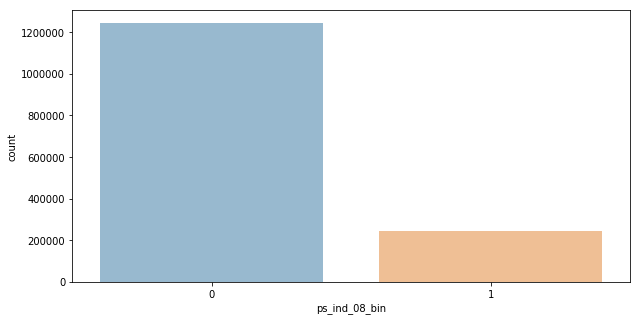

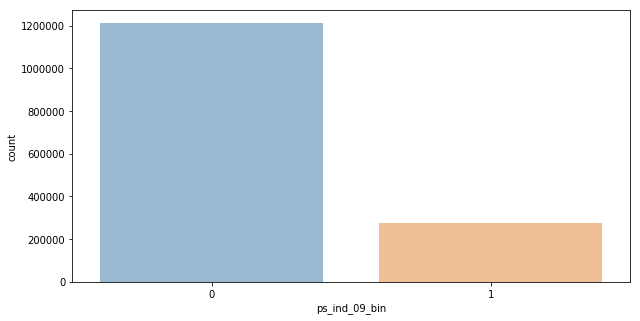

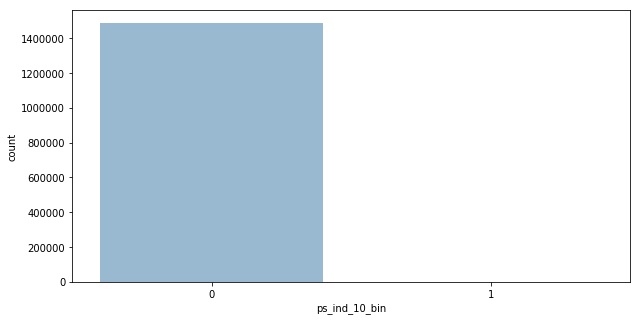

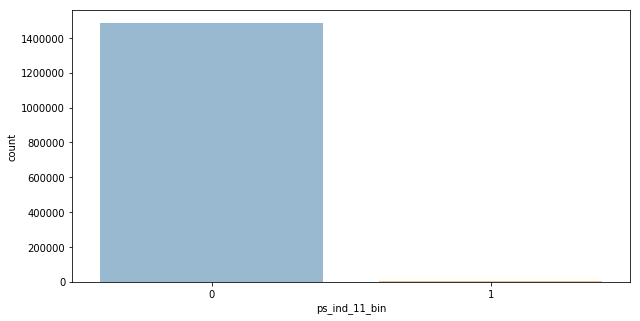

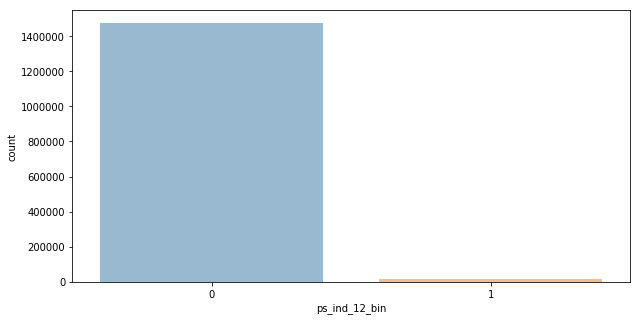

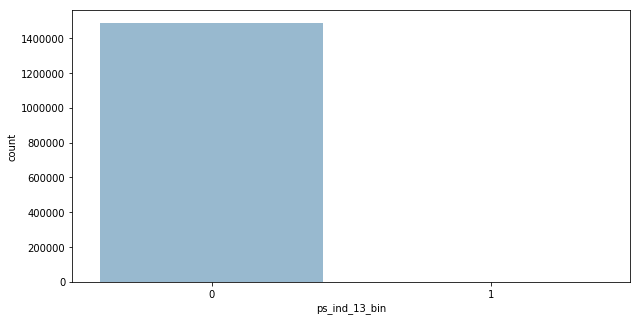

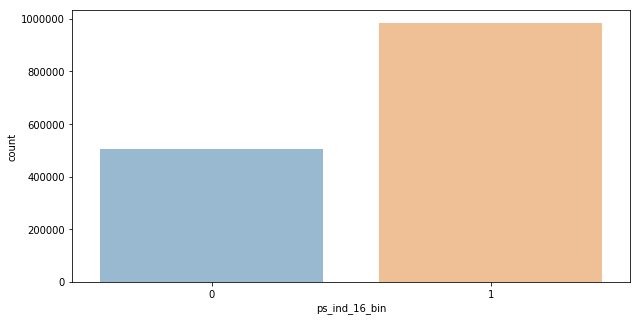

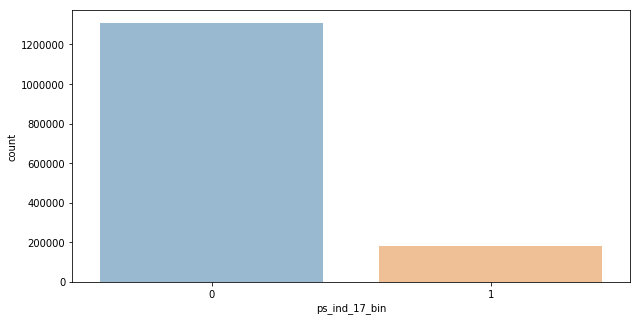

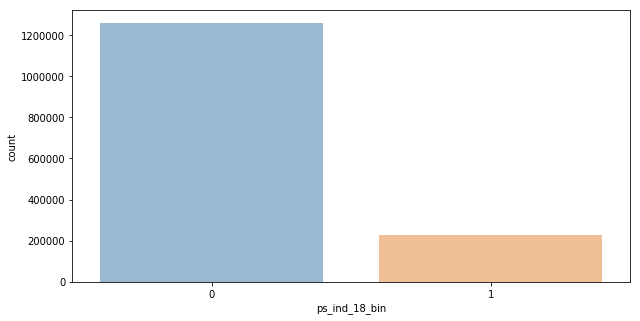

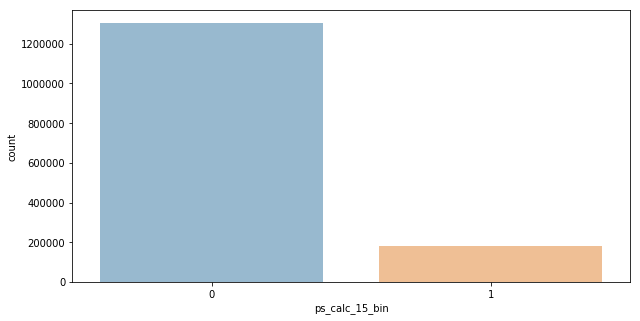

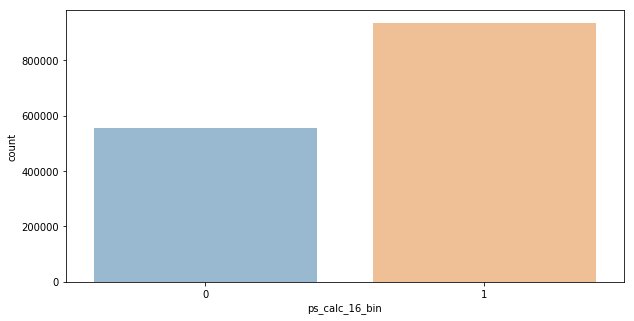

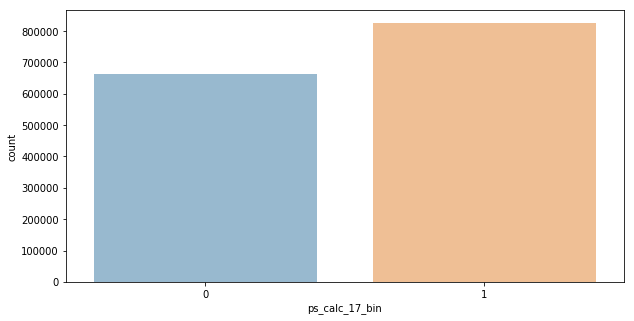

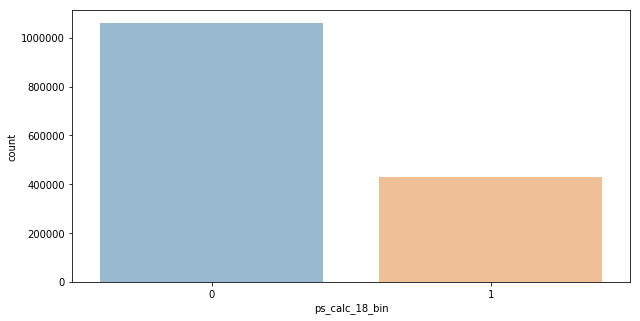

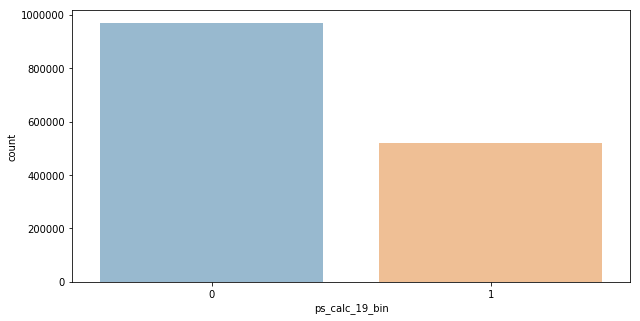

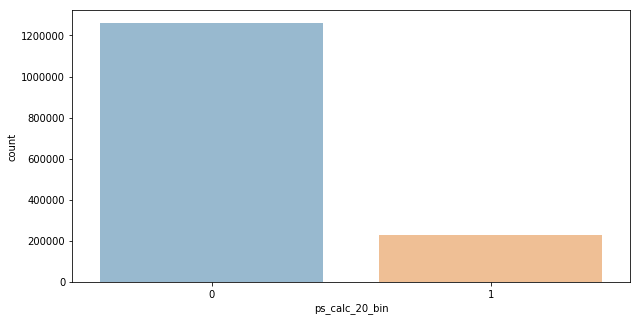

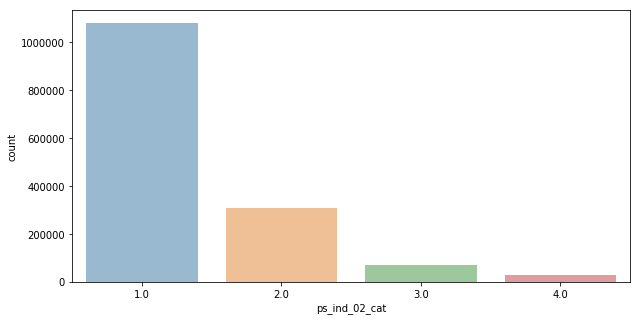

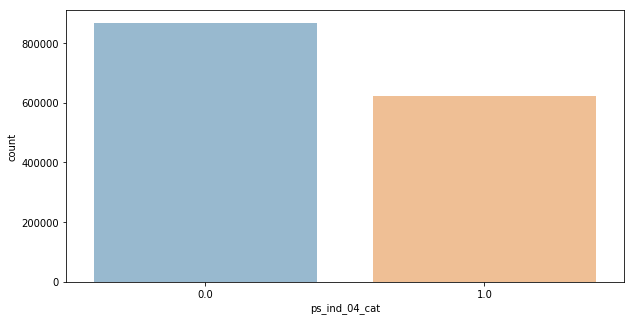

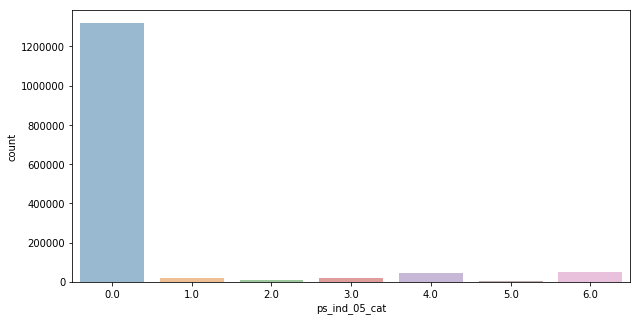

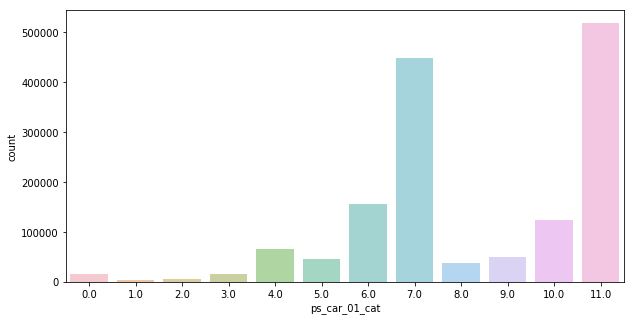

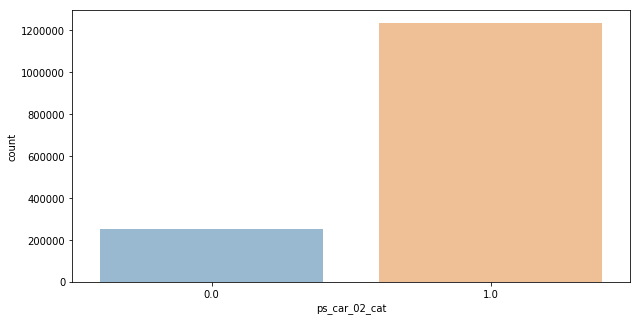

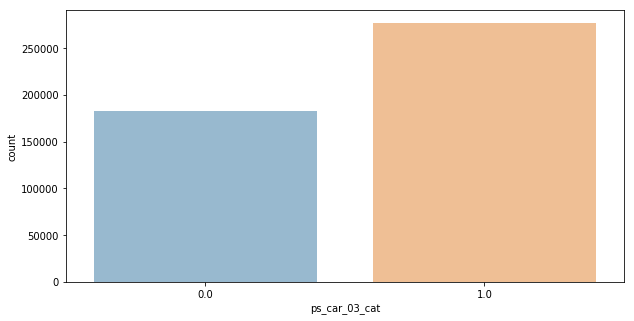

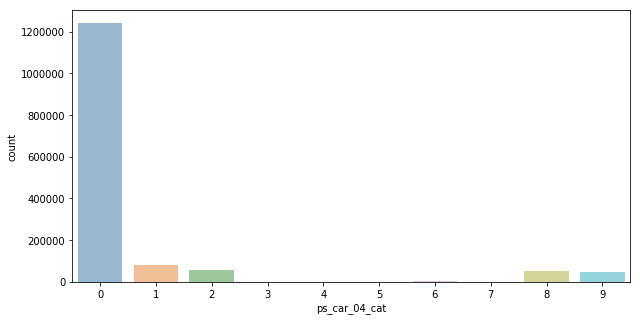

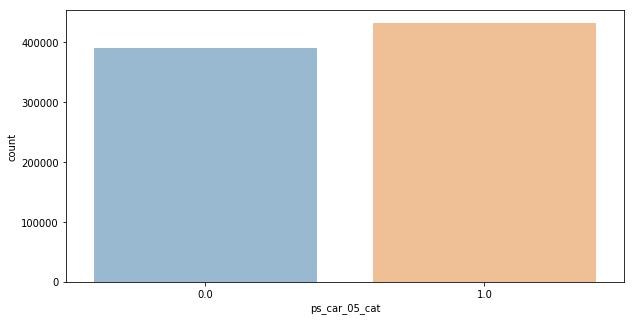

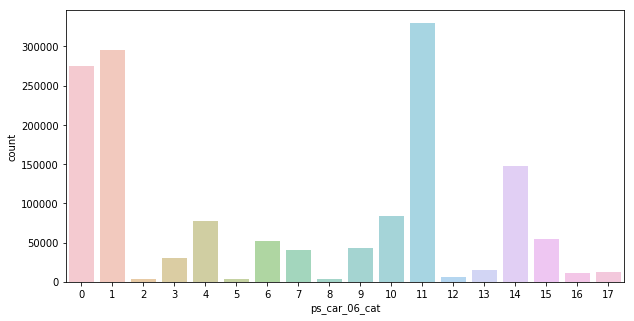

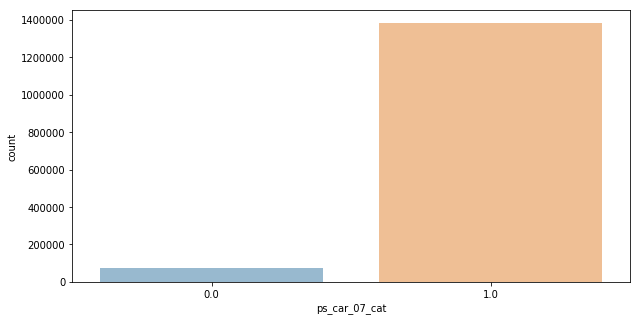

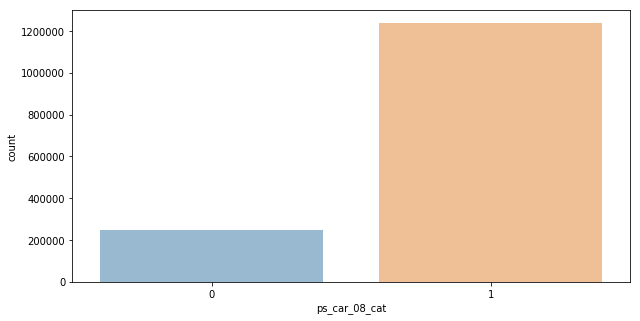

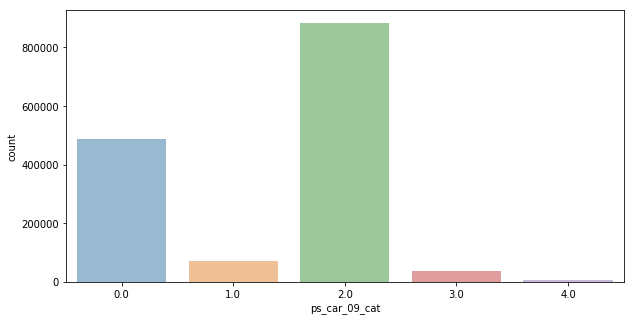

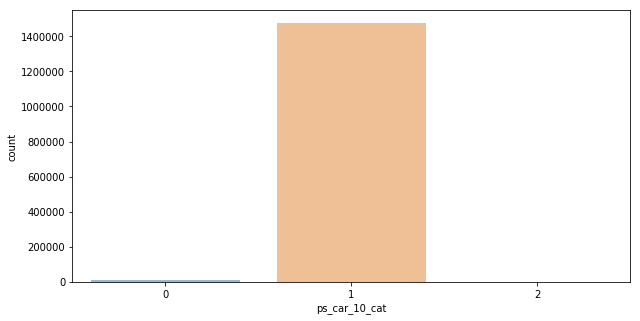

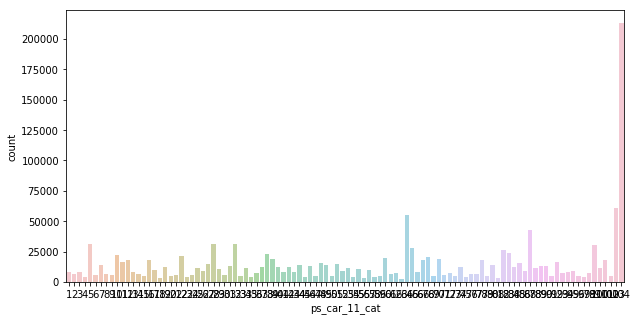

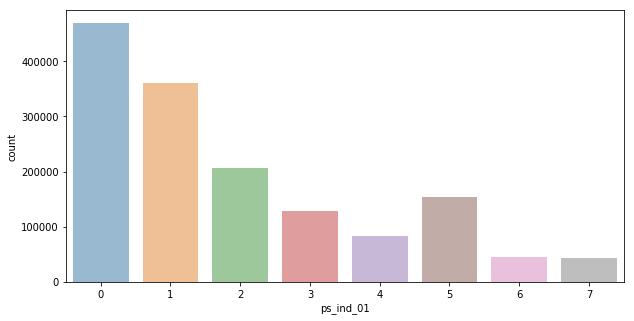

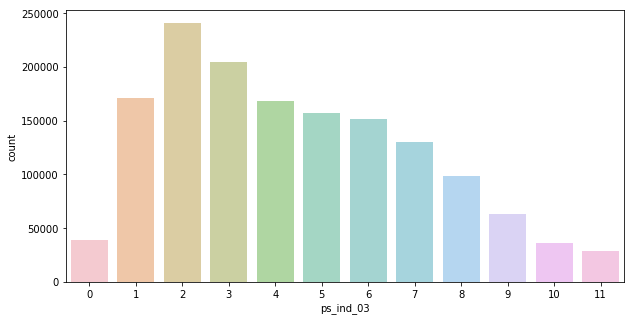

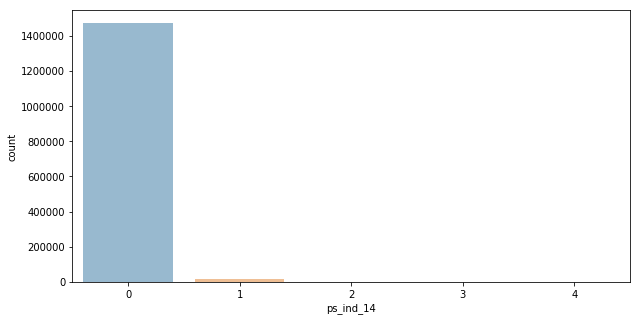

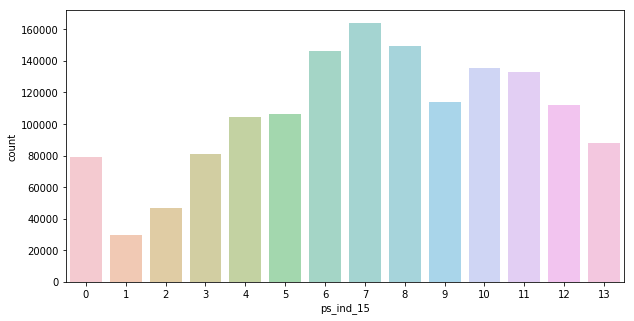

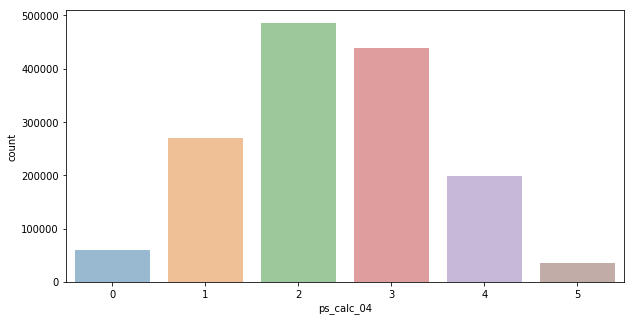

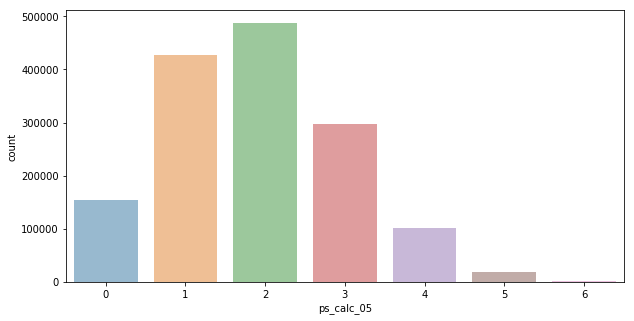

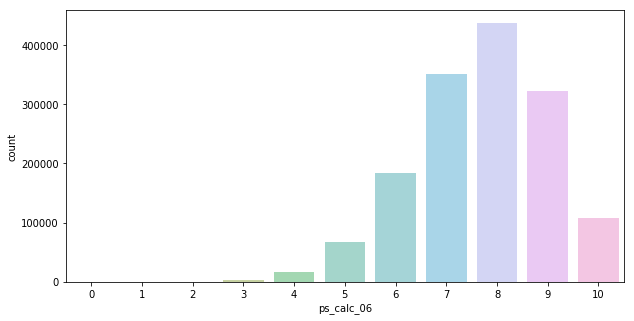

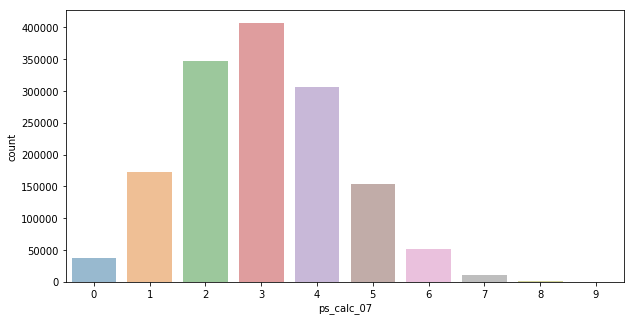

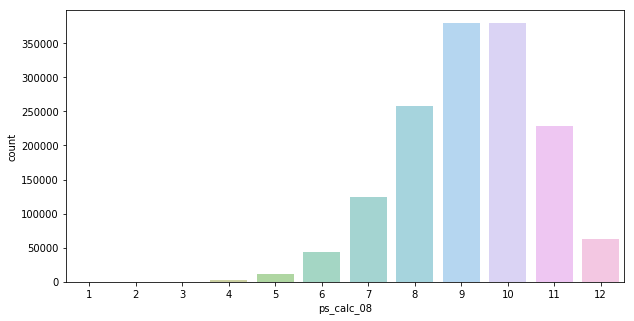

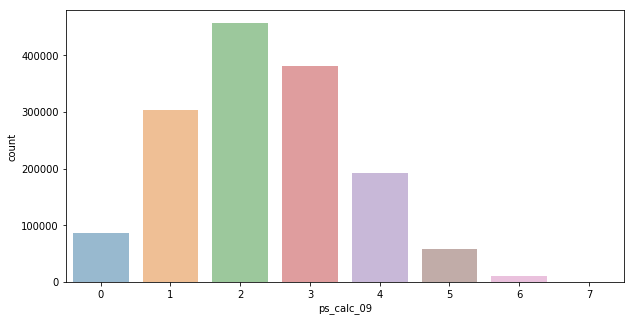

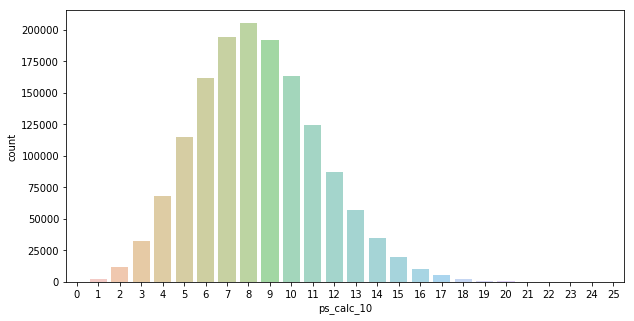

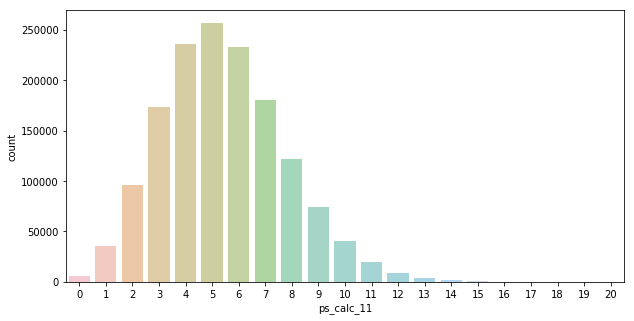

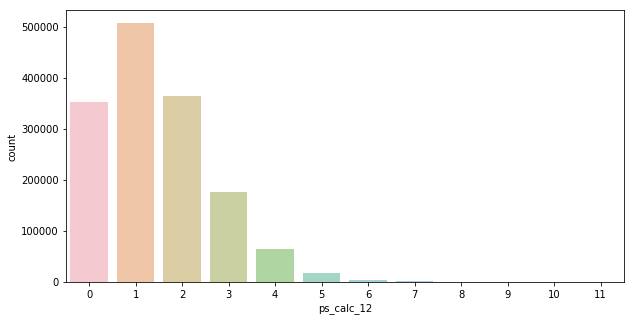

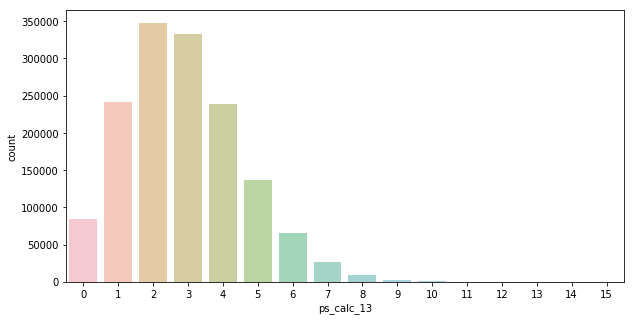

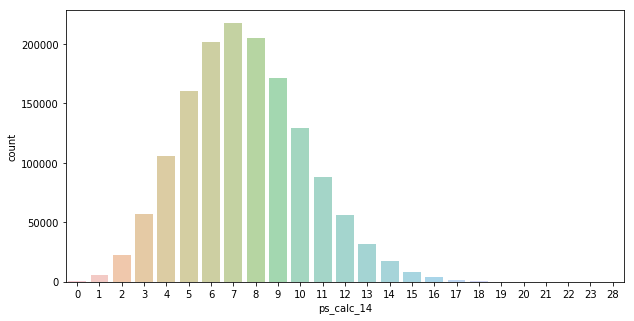

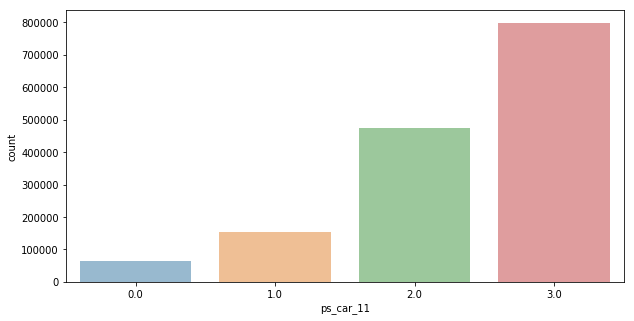

In [ ]:
for col in binary + category + integer:
    bar_plot(col, df)

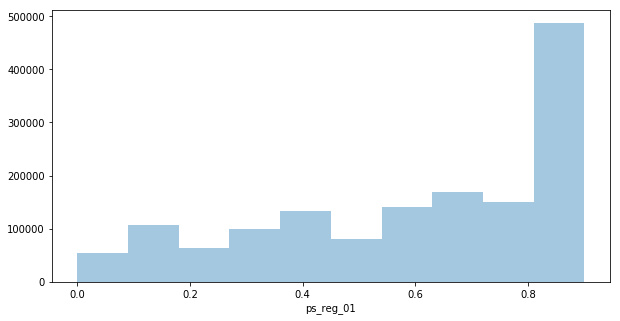

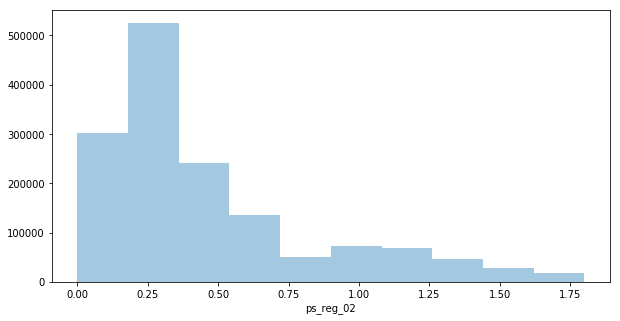

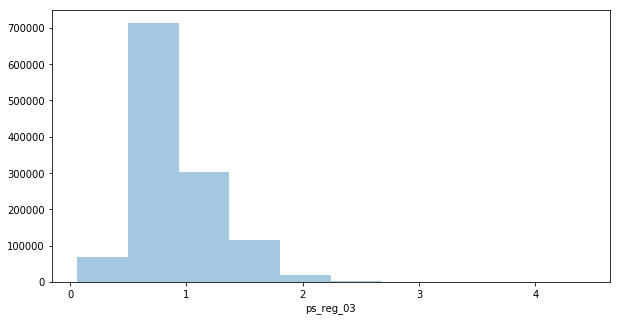

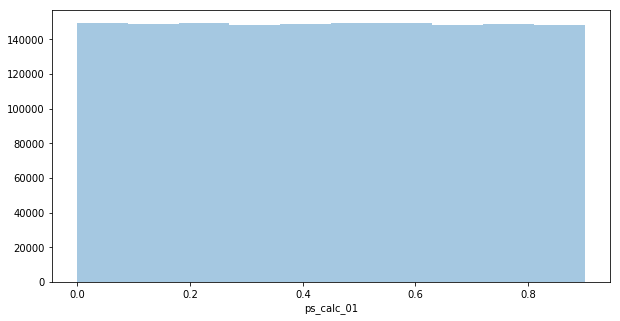

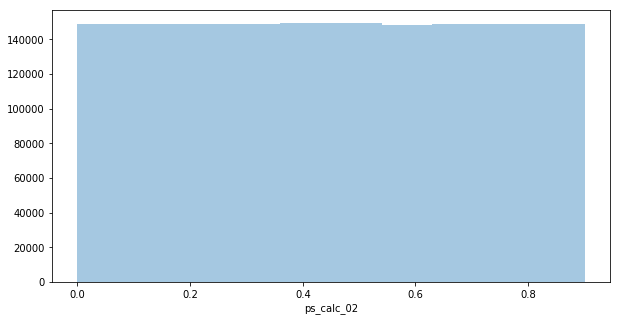

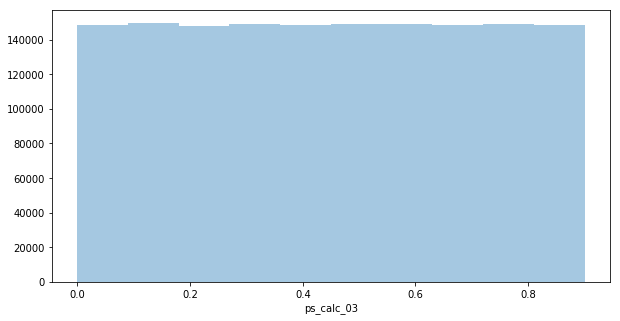

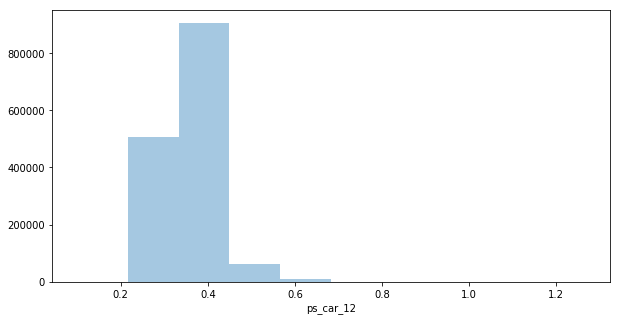

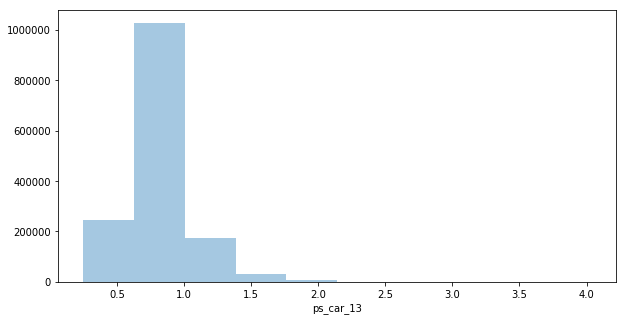

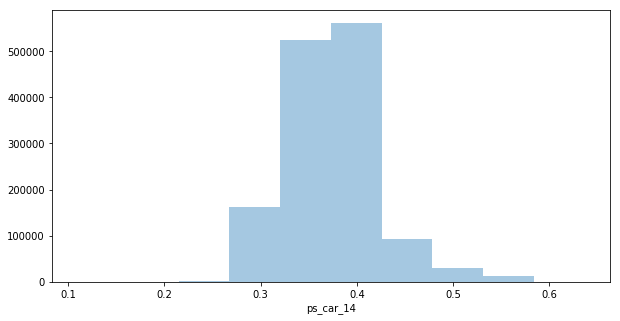

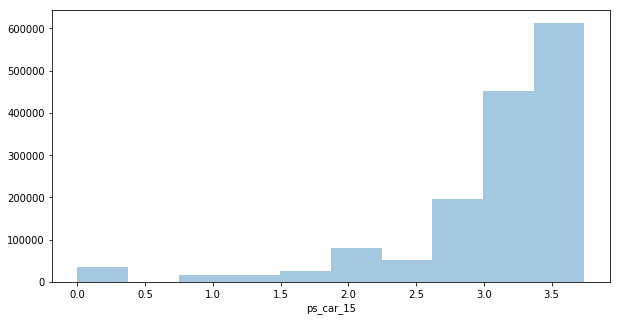

In [ ]:
for col in floats:
    dist_plot(col, df)

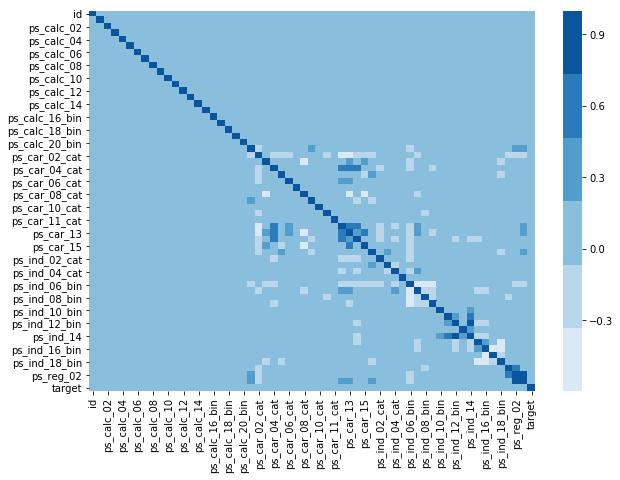

In [ ]:
corr = df.corr()
cmap = sns.color_palette('Blues')
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap=cmap)

### 단일 변수 vs 타겟 변수

In [ ]:
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y='target',data=data)
    plt.show()


/Users/sanghyub/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


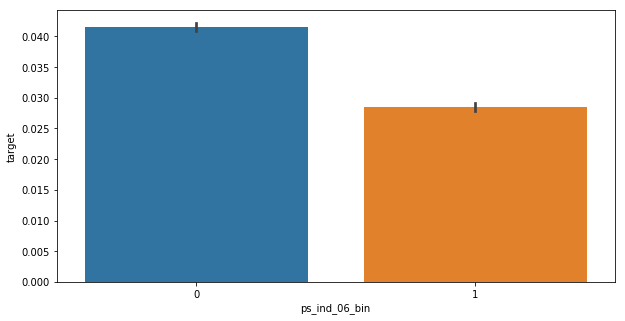

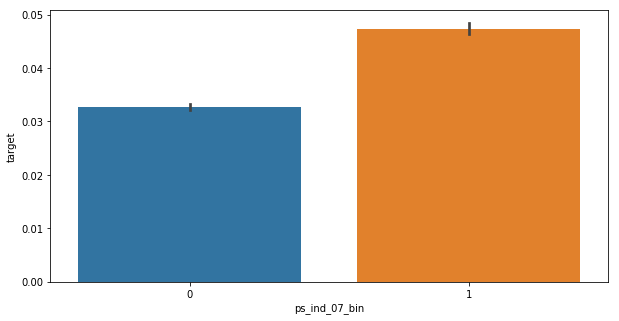

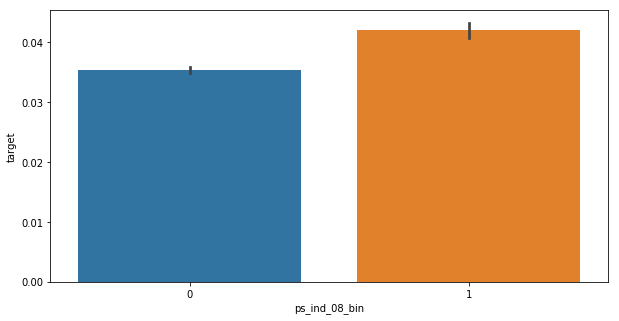

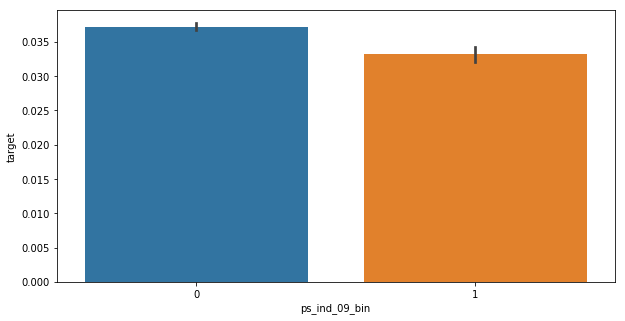

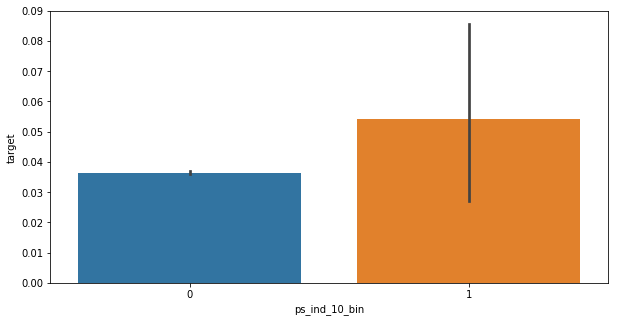

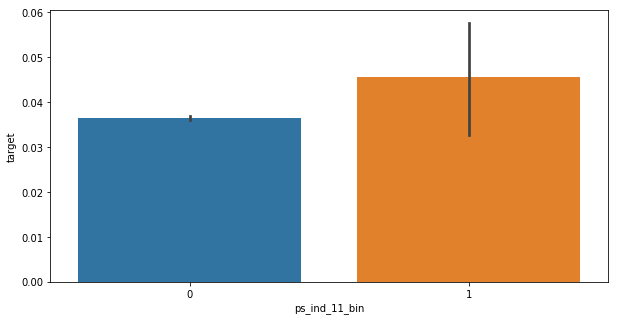

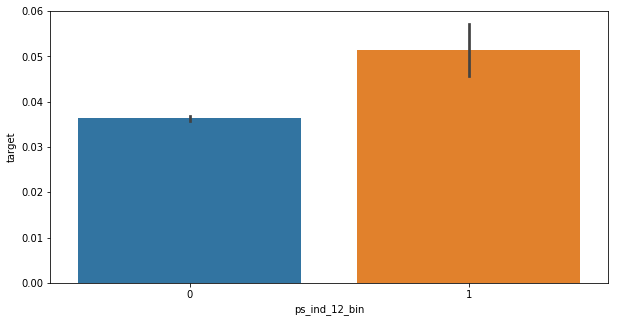

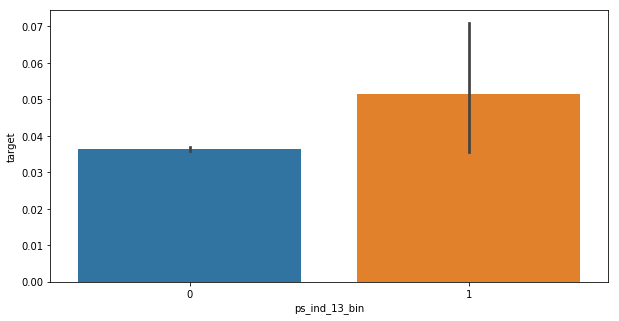

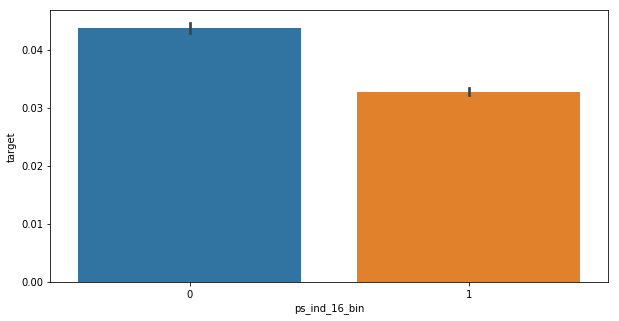

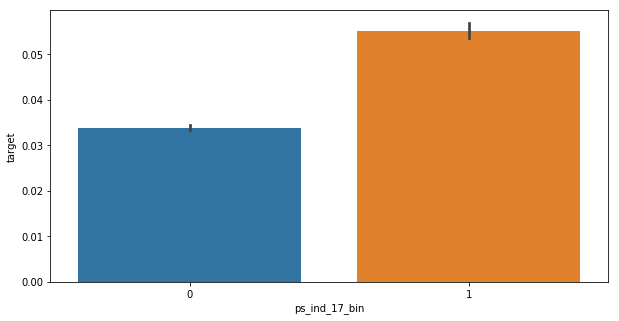

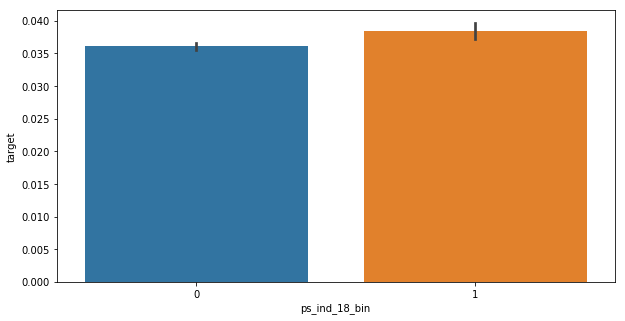

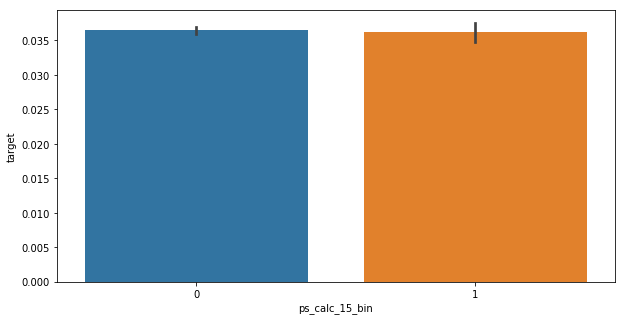

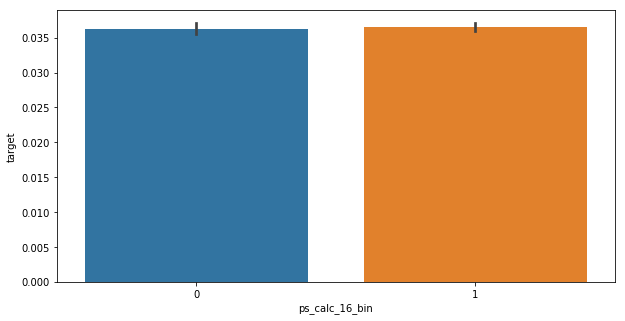

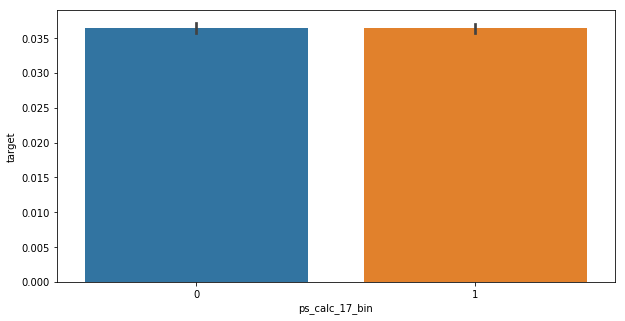

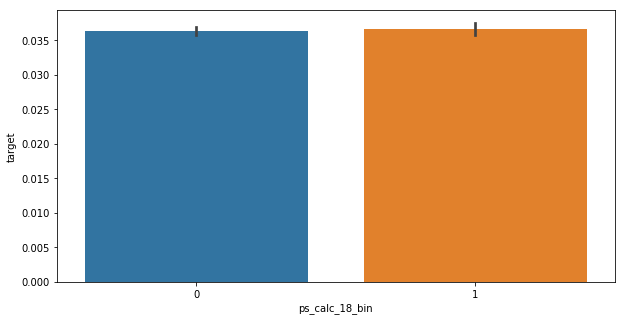

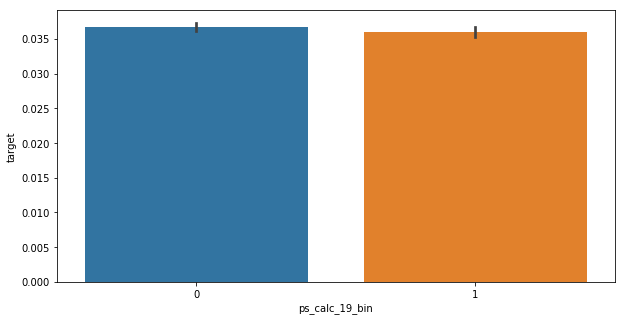

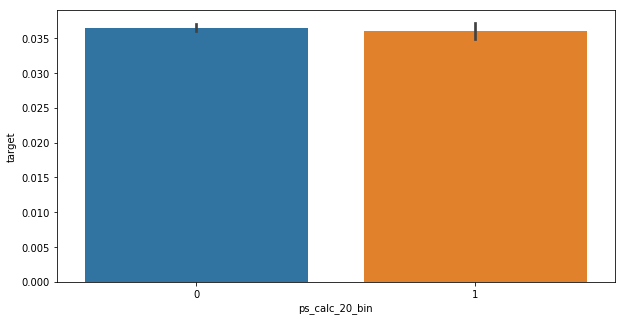

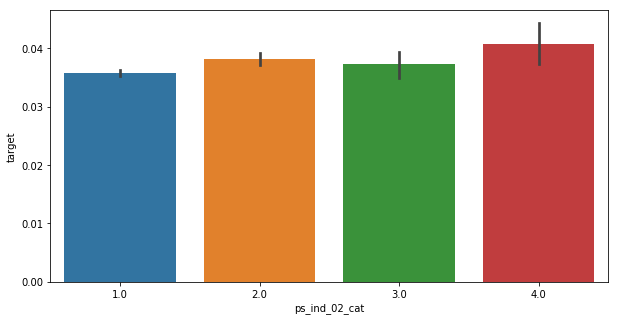

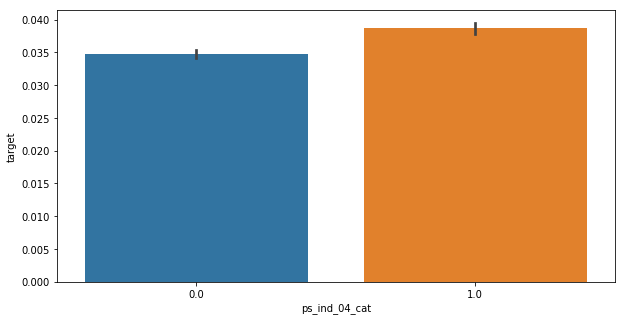

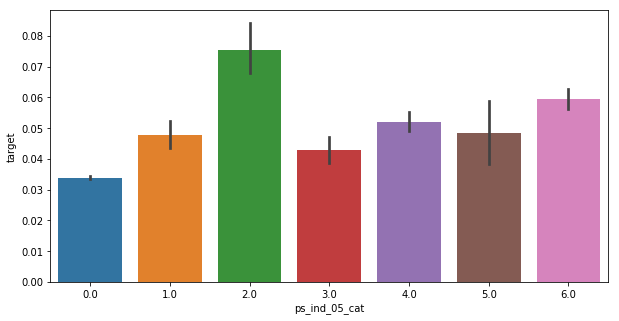

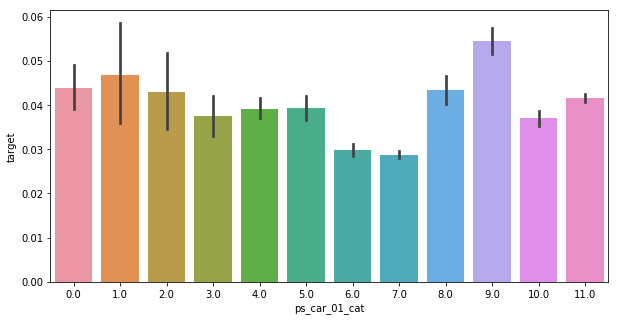

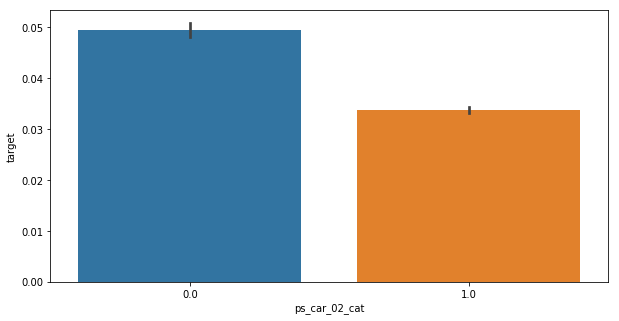

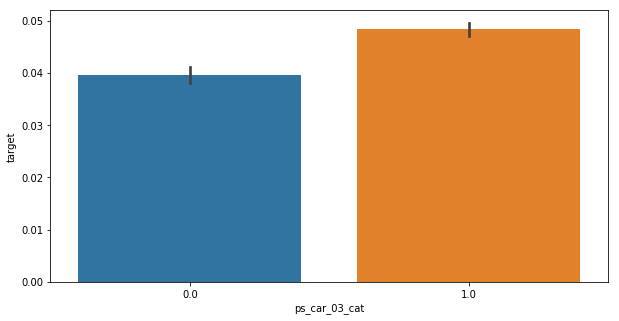

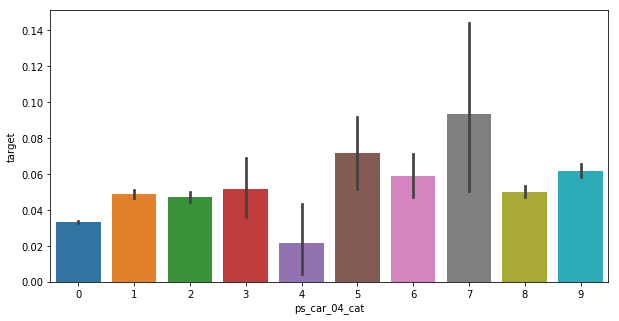

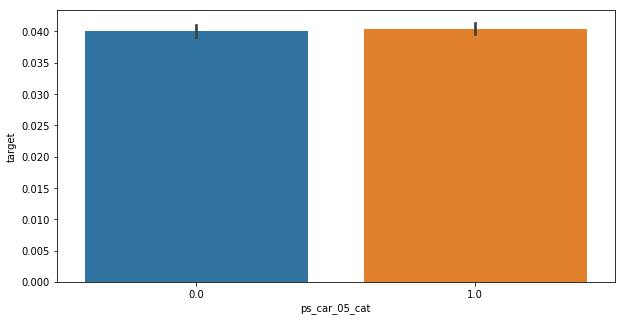

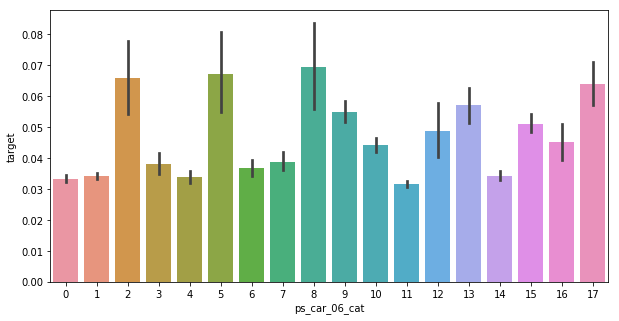

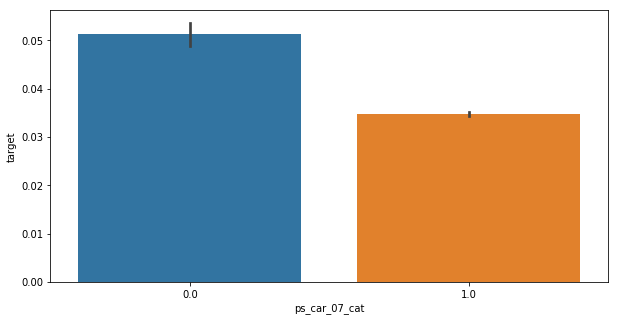

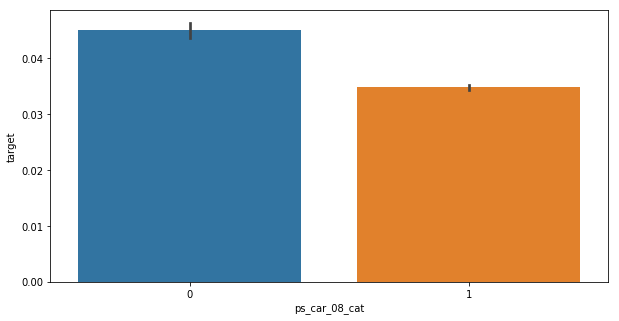

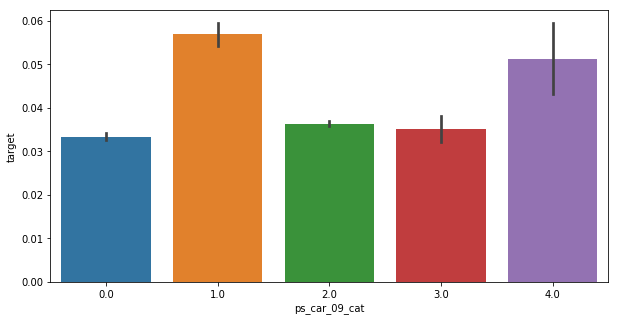

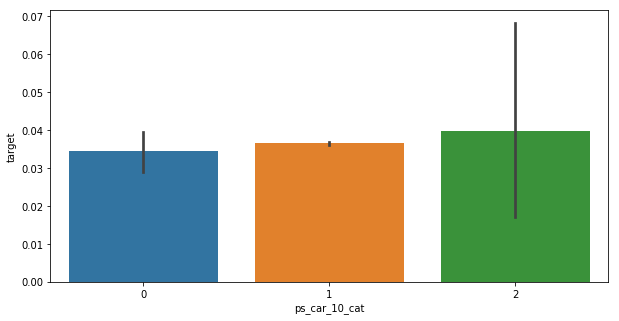

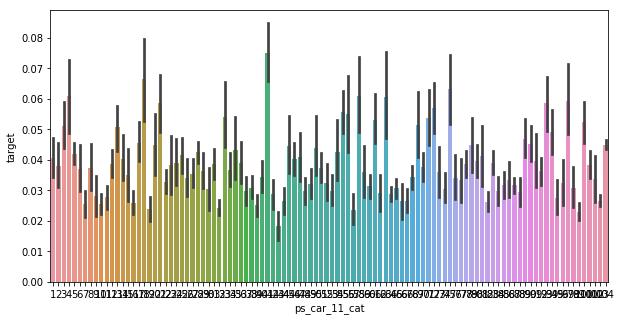

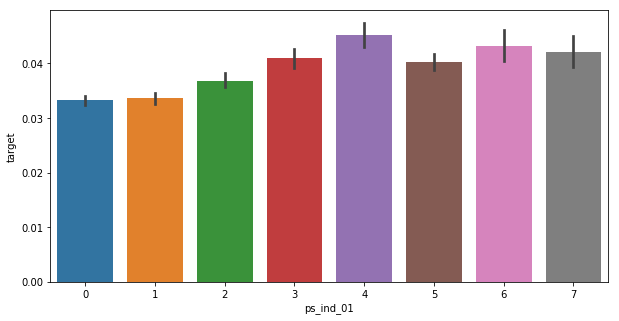

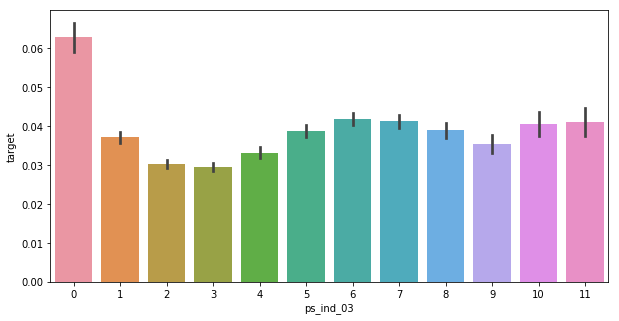

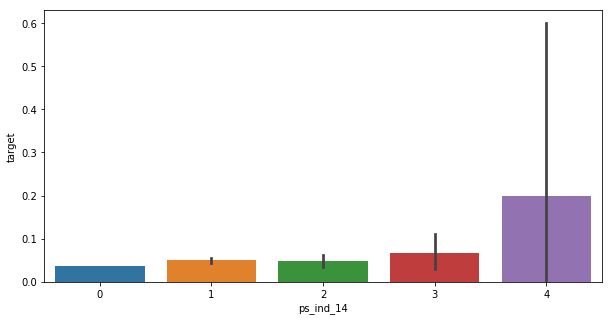

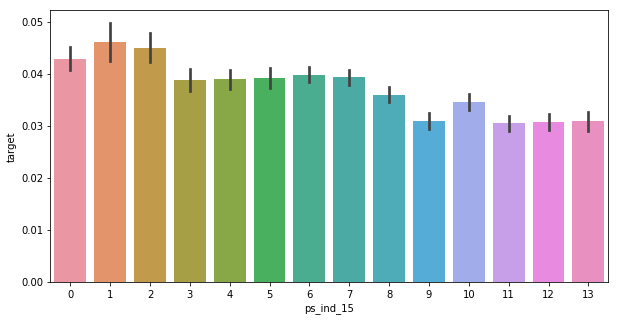

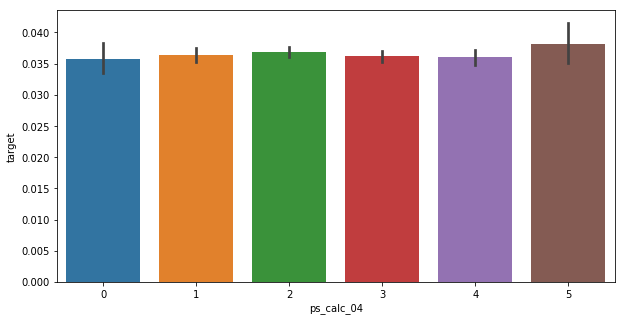

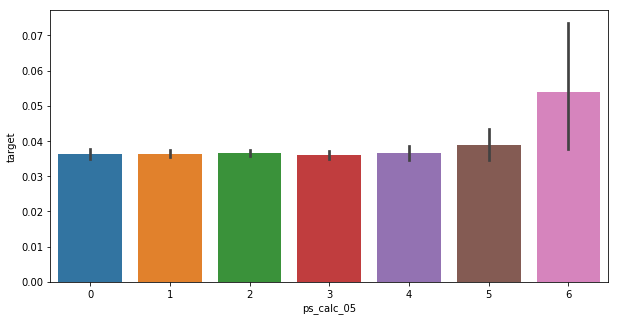

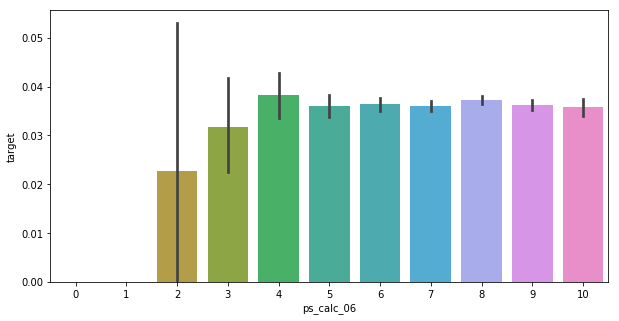

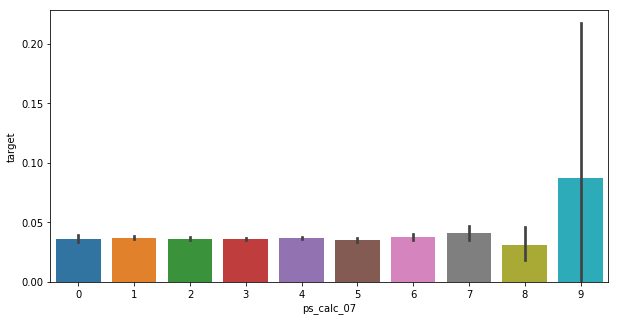

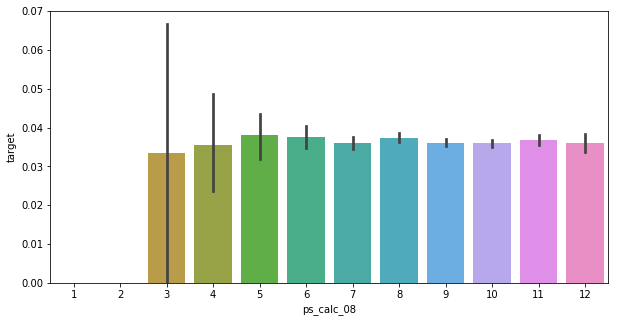

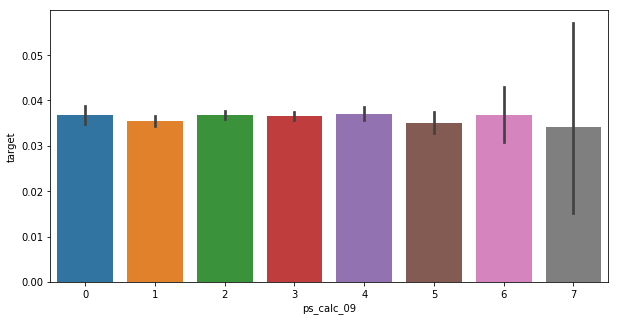

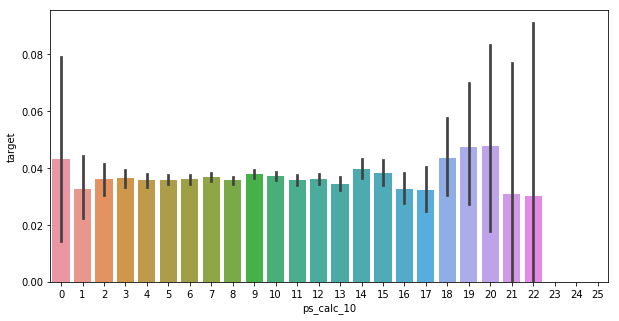

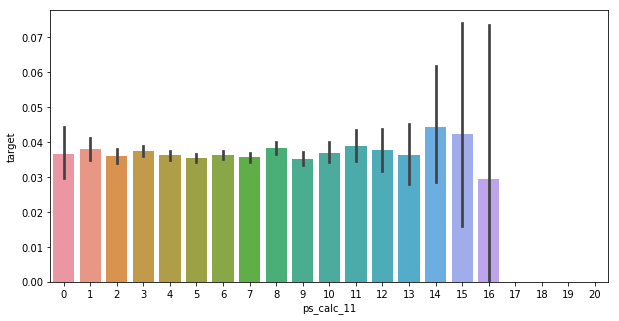

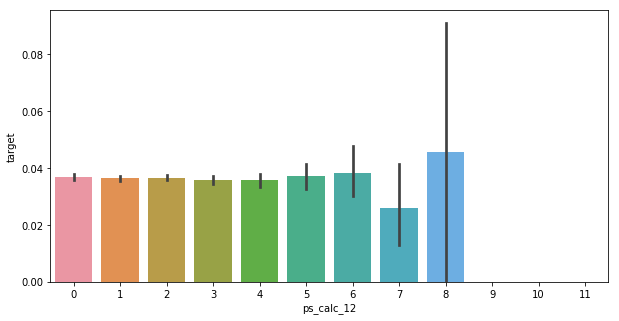

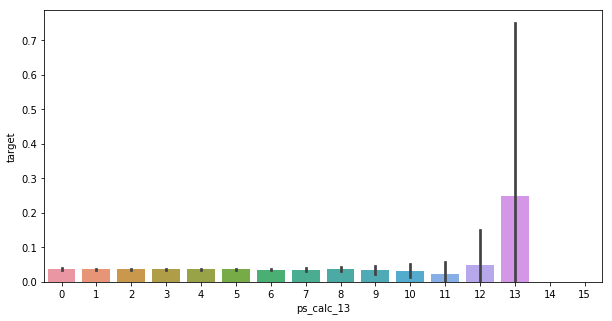

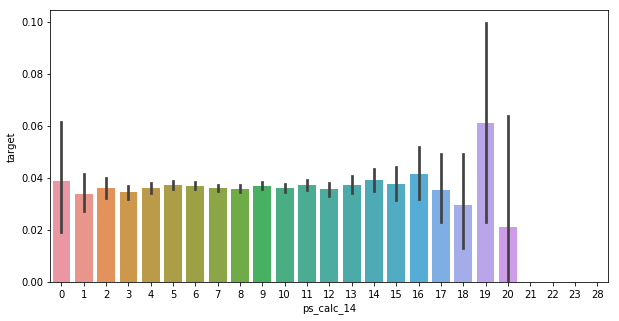

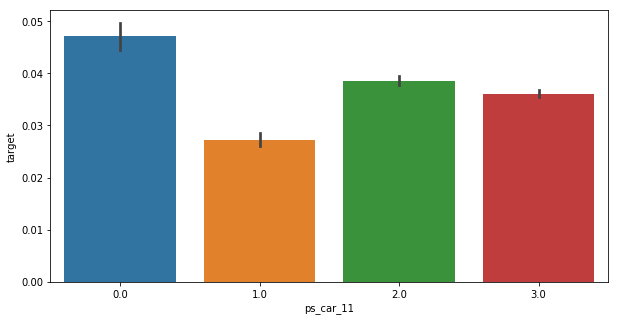

In [ ]:
for col in binary + category + integer :
    bar_plot_ci(col,df)

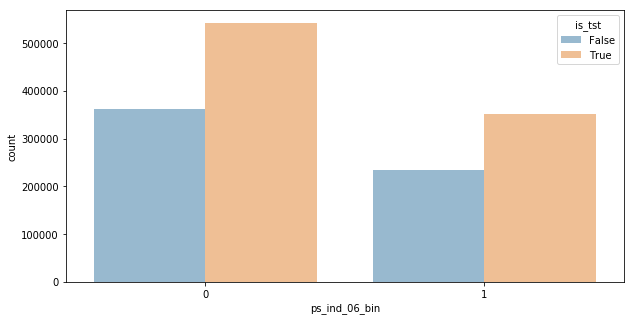

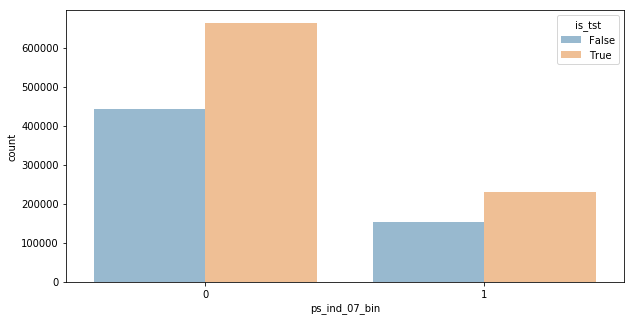

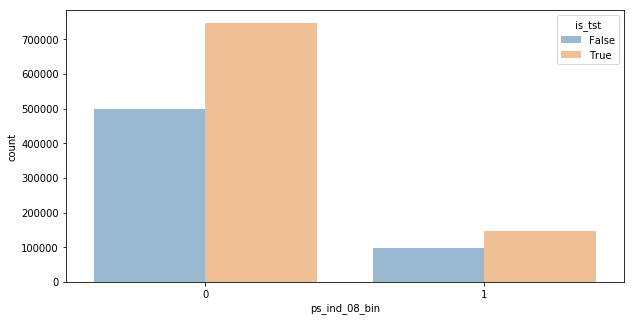

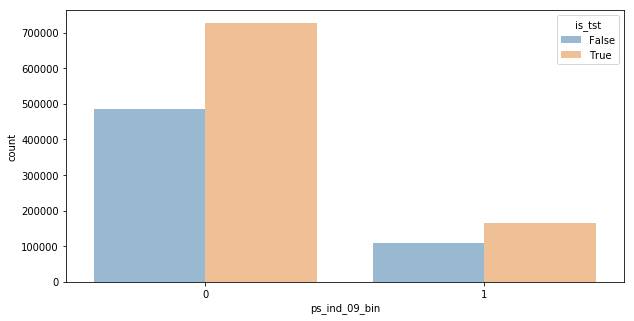

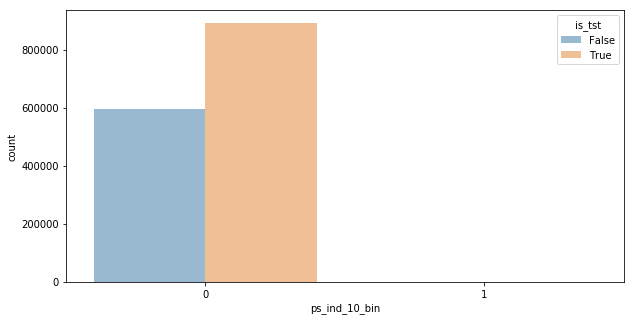

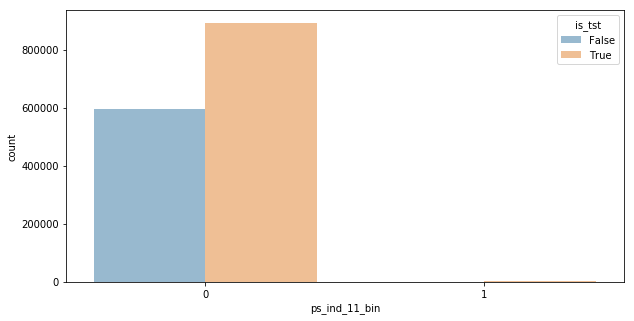

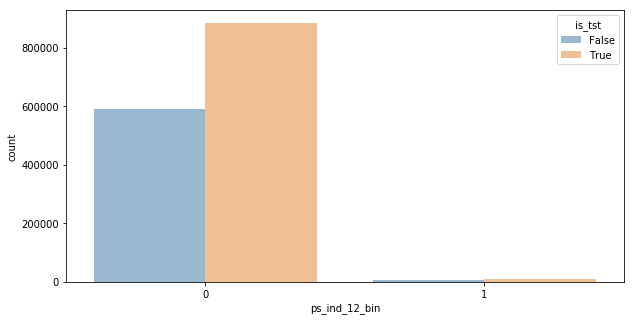

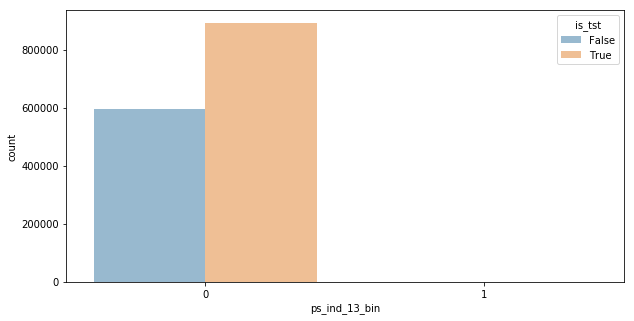

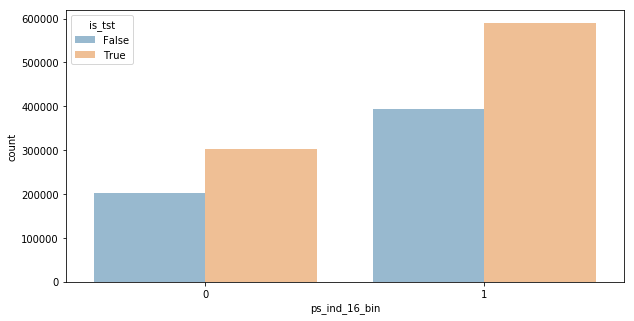

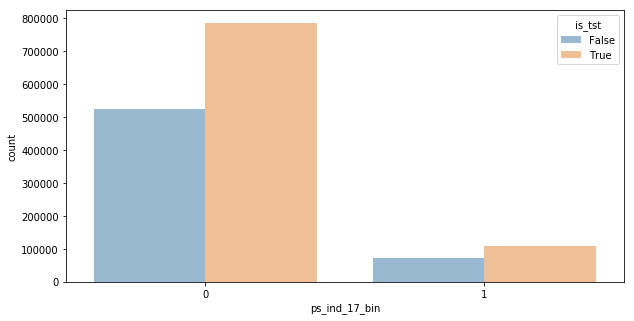

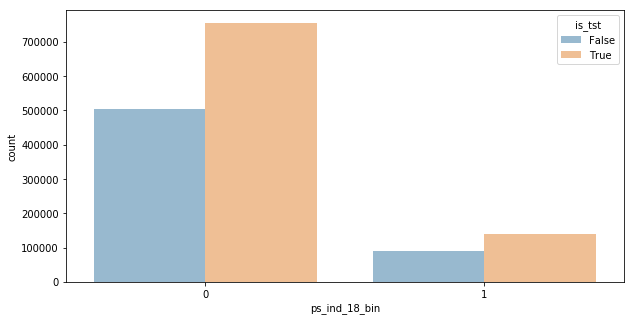

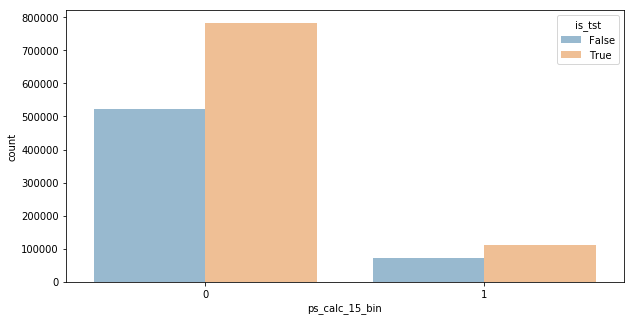

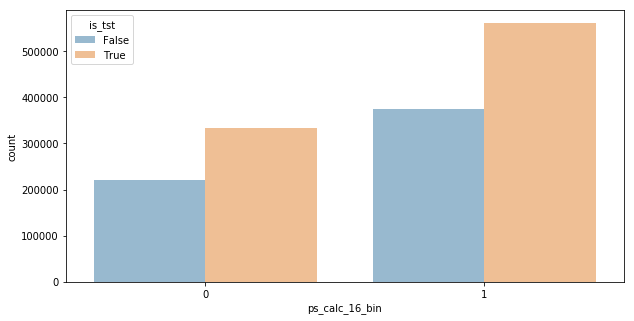

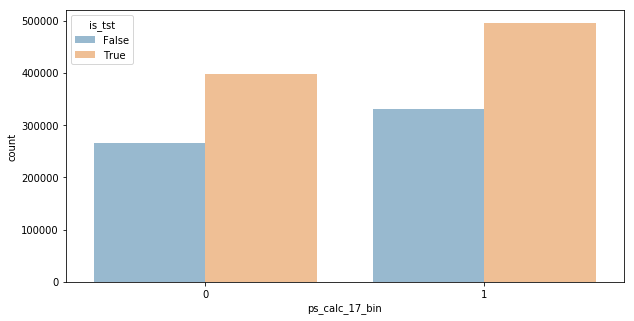

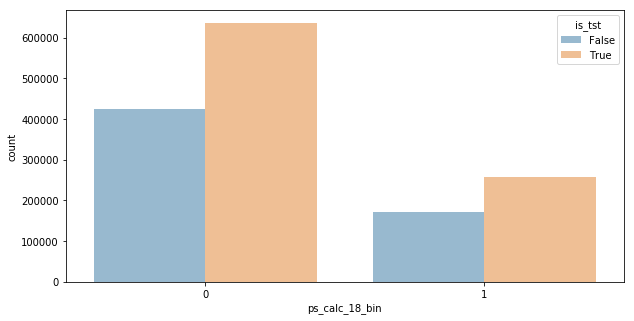

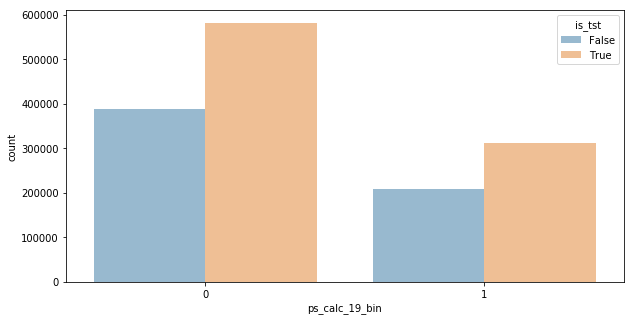

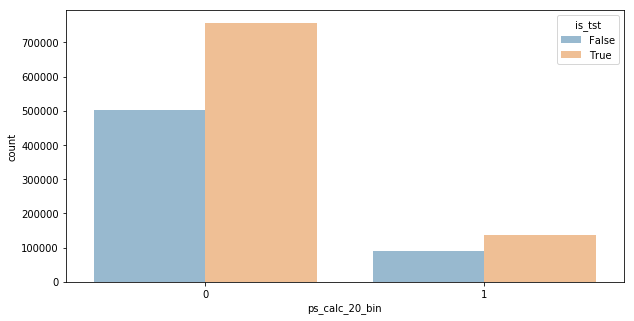

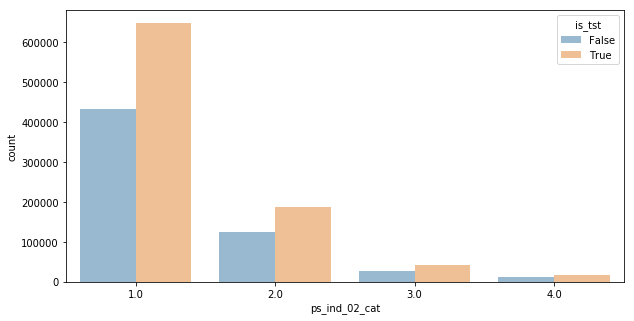

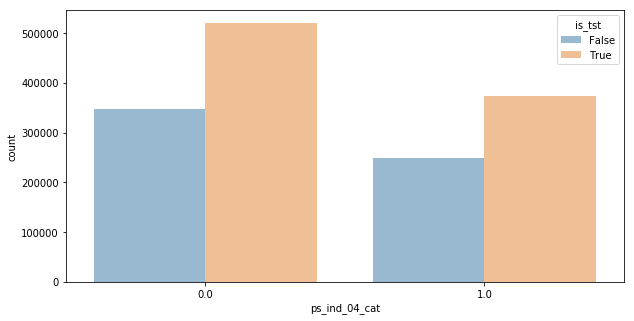

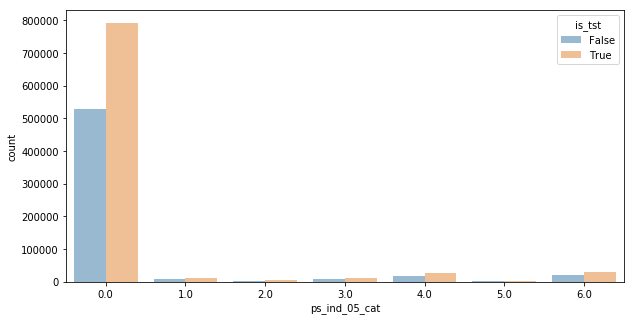

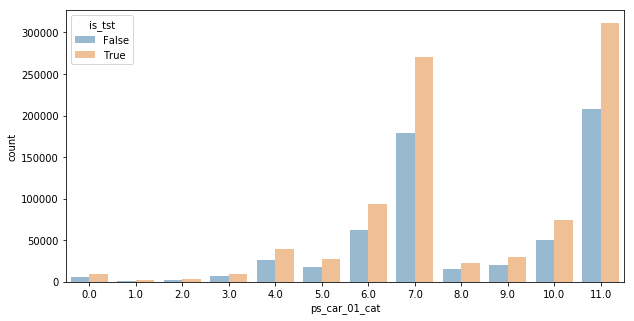

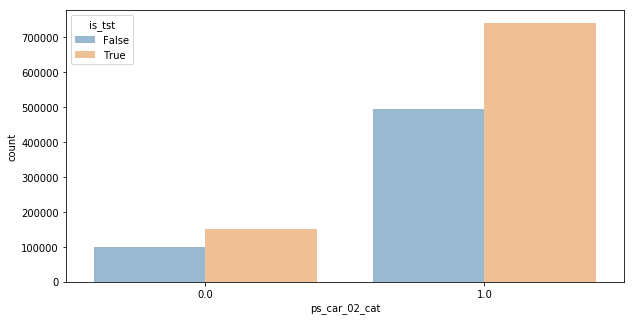

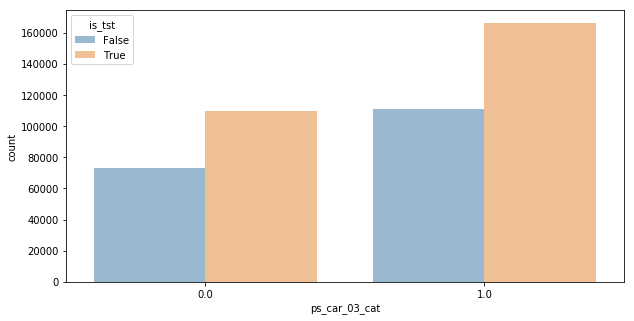

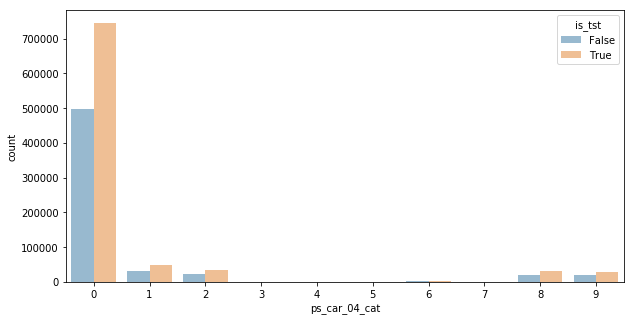

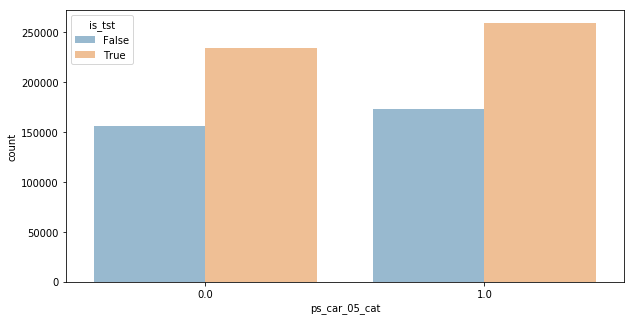

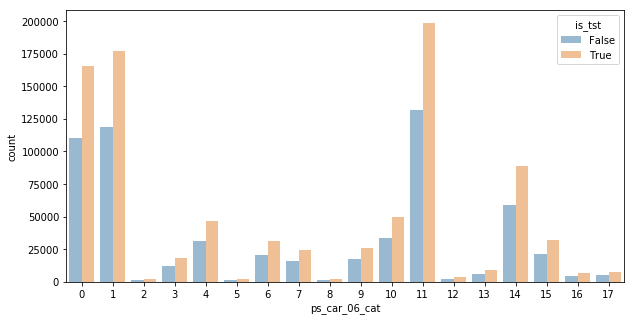

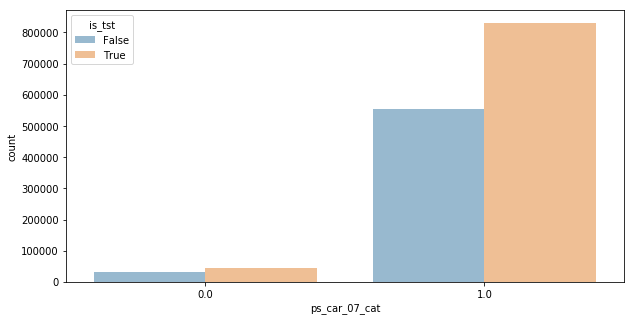

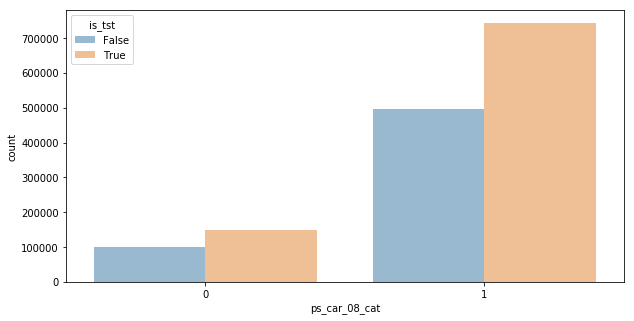

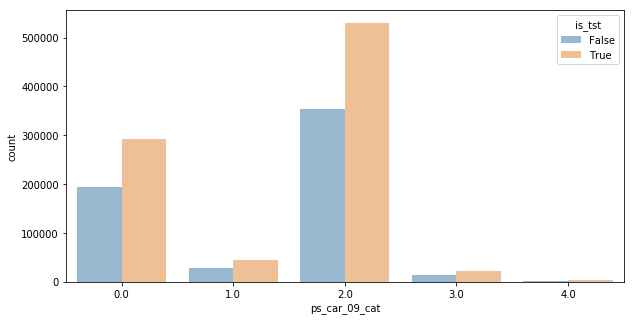

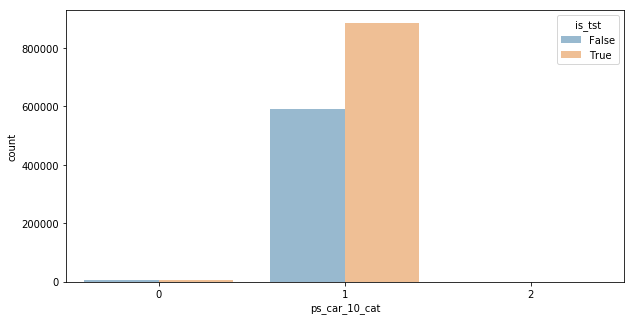

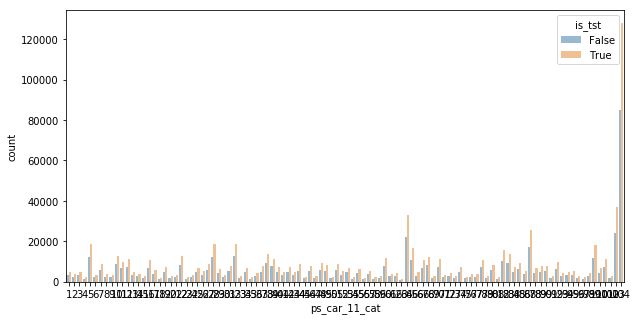

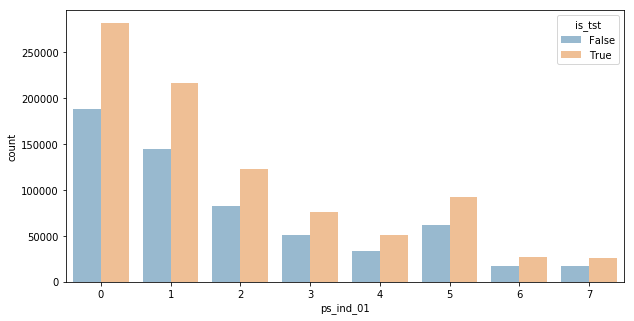

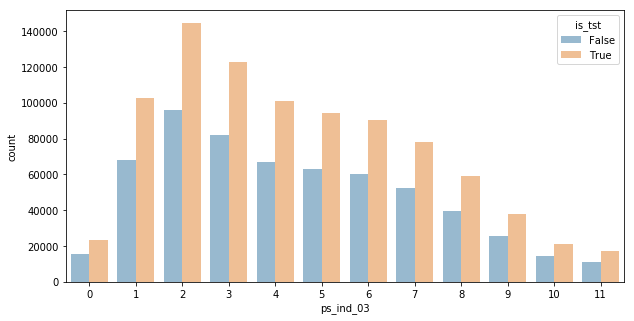

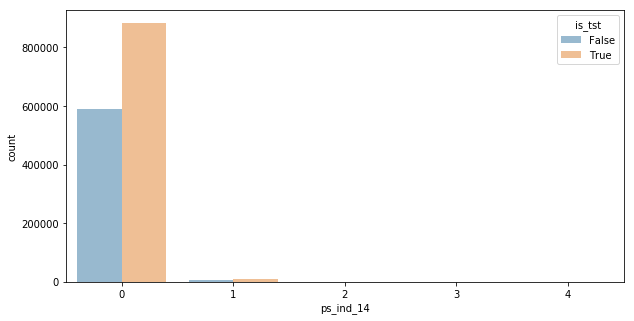

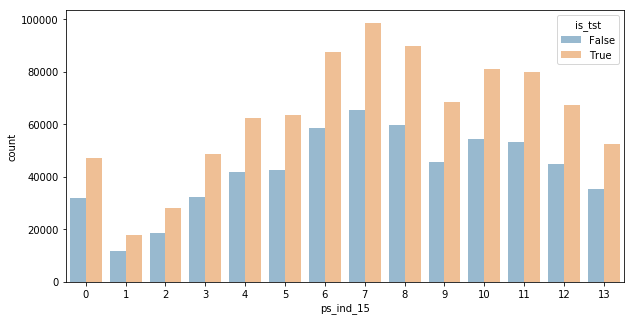

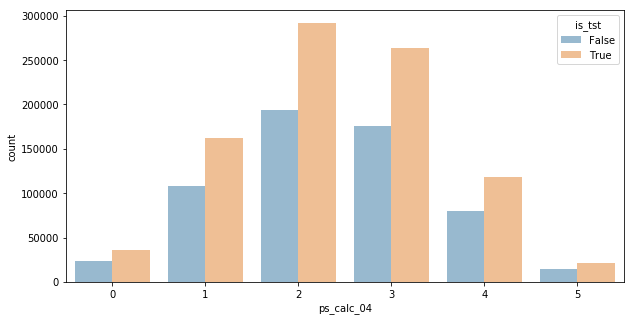

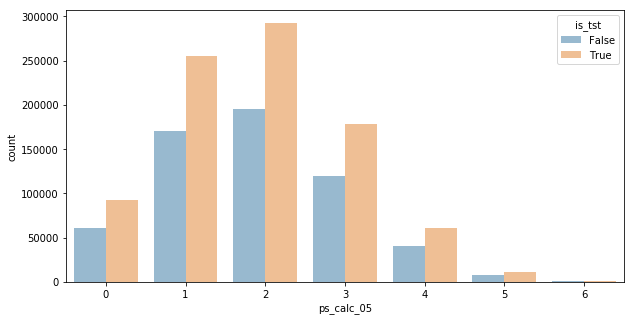

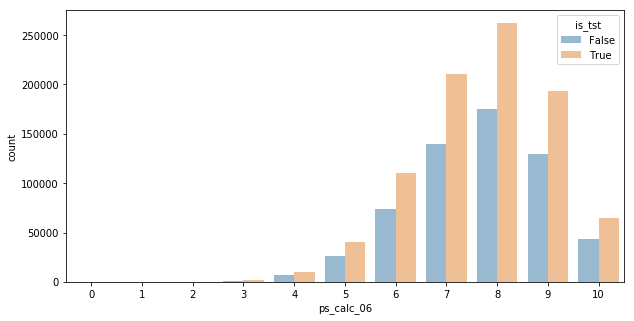

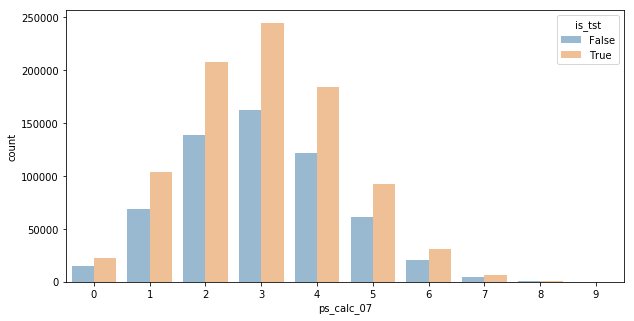

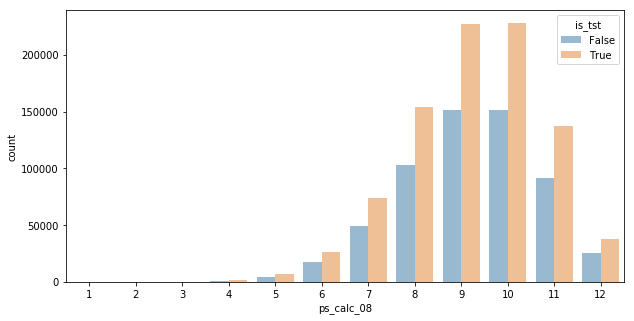

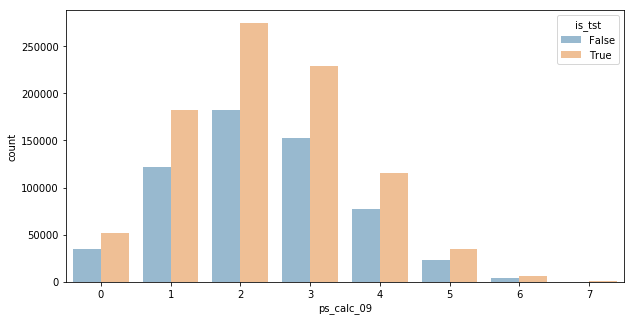

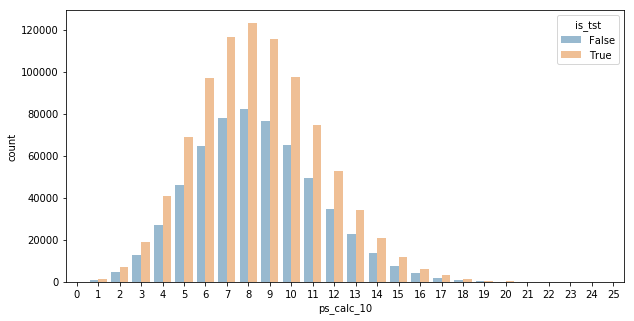

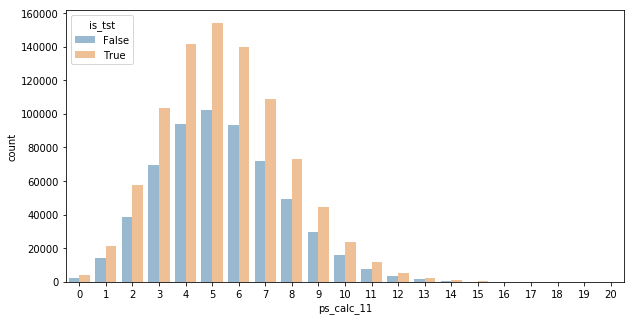

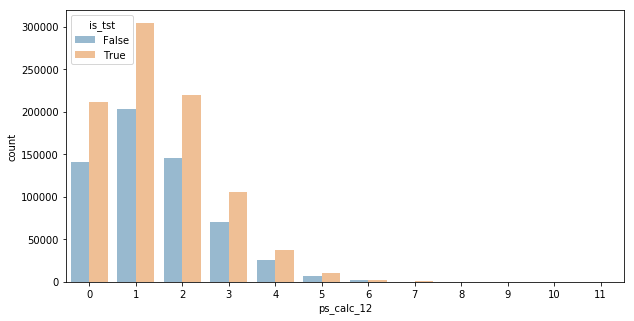

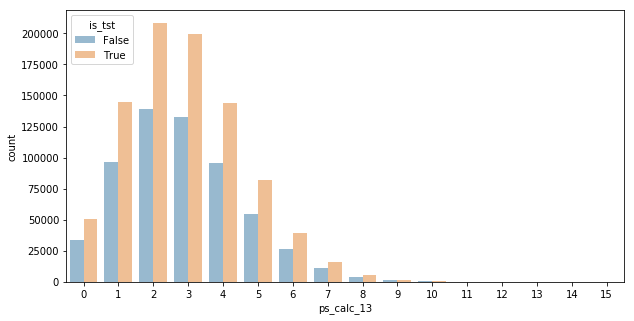

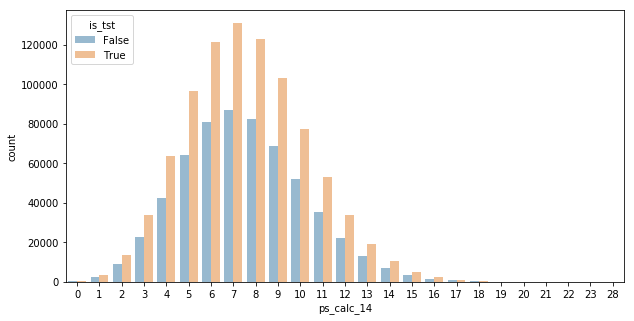

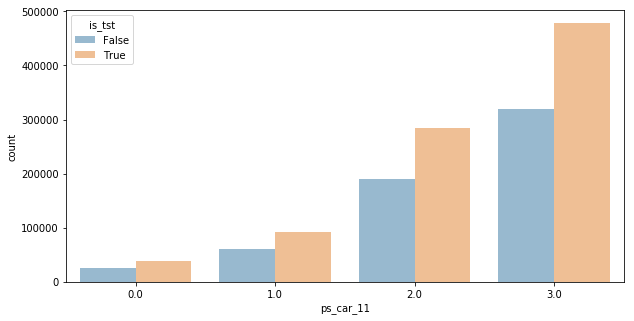

In [ ]:
df['is_tst'] = df['target'].isnull()
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')

In [ ]:
import pandas as pd

# 훈련/테스트 데이터를 읽어온다
train = pd.read_csv("data/train.csv")
train_label = train['target']
train_id = train['id']
del train['target'], train['id']

test = pd.read_csv("data/test.csv")
test_id = test['id']
del test['id']

# 파생 변수 01 : 결측값을 의미하는 “-1”의 개수를 센다
train['missing'] = (train==-1).sum(axis=1).astype(float)
test['missing'] = (test==-1).sum(axis=1).astype(float)

# 파생 변수 02 : 이진 변수의 합
bin_features = [c for c in train.columns if 'bin' in c]
train['bin_sum'] = train[bin_features].sum(axis=1)
test['bin_sum'] = test[bin_features].sum(axis=1)

In [ ]:
# 파생 변수 03 : 단일변수 타겟 비율 분석으로 선정한 변수를 기반으로 Target Encoding을 수행한다. Target Encoding은 교차 검증 과정에서 진행한다.
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',\
            'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_16_bin',\
            'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_ind_04_cat',\
            'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',\
            'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat',\
            'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',\
            'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_15',\
            'ps_car_11']

# LightGBM 모델의 설정값이다.
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 15,
          "max_bin": 256,
          "feature_fraction": 0.6,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "seed": 2018
}

# Stratified 5-Fold 내부 교차 검증을 준비한다
NFOLDS = 5
kfold = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=218)
kf = kfold.split(train, train_label)

cv_train = np.zeros(len(train_label))
cv_pred = np.zeros(len(test_id))    
best_trees = []
fold_scores = []

In [ ]:
for i, (train_fold, validate) in enumerate(kf):
    # 훈련/검증 데이터를 분리한다
    X_train, X_validate, label_train, label_validate = train.iloc[train_fold, :], train.iloc[validate, :], train_label[train_fold], train_label[validate]
    
    # target encoding 피쳐 엔지니어링을 수행한다
    for feature in features:
        # 훈련 데이터에서 feature 고유값별 타겟 변수의 평균을 구한다
        map_dic = pd.DataFrame([X_train[feature], label_train]).T.groupby(feature).agg('mean')
        map_dic = map_dic.to_dict()['target']
        # 훈련/검증/테스트 데이터에 평균값을 매핑한다
        X_train[feature + '_target_enc'] = X_train[feature].apply(lambda x: map_dic.get(x, 0))
        X_validate[feature + '_target_enc'] = X_validate[feature].apply(lambda x: map_dic.get(x, 0))
        test[feature + '_target_enc'] = test[feature].apply(lambda x: map_dic.get(x, 0))

    dtrain = lgbm.Dataset(X_train, label_train)
    dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
    # 훈련 데이터를 학습하고, evalerror() 함수를 통해 검증 데이터에 대한 정규화 Gini 계수 점수를 기준으로 최적의 트리 개수를 찾는다.
    bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, verbose_eval=100, early_stopping_rounds=100)
    best_trees.append(bst.best_iteration)
    # 테스트 데이터에 대한 예측값을 cv_pred에 더한다.
    cv_pred += bst.predict(test, num_iteration=bst.best_iteration)
    cv_train[validate] += bst.predict(X_validate)

    # 검증 데이터에 대한 평가 점수를 출력한다.
    score = Gini(label_validate, cv_train[validate])
    print(score)
    fold_scores.append(score)

cv_pred /= NFOLDS

# 시드값별로 교차 검증 점수를 출력한다.
print("cv score:")
print(Gini(train_label, cv_train))
print(fold_scores)
print(best_trees, np.mean(best_trees))

# 테스트 데이터에 대한 결과물을 저장한다.
pd.DataFrame({'id': test_id, 'target': cv_pred}).to_csv('../model/lgbm_baseline.csv', index=False)

/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sanghyub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [ ]:
import lightgbm as lgbm